In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np

In [2]:
path_losses = ["./training_logs/160M_train_loss.csv", "./training_logs/1.4B_train_loss.csv"]
path_learning_rate = ["./training_logs/160M_learning_rate.csv", "./training_logs/1.4B_learning_rate.csv"]

In [3]:
df1_losses = pd.read_csv(path_losses[1], sep=",")
df1_learning_rate = pd.read_csv(path_learning_rate[1], sep=",")


In [4]:
df_learning_rate = pd.read_csv(path_learning_rate[0], sep=",")


learning_rates = df_learning_rate.loc[:, ["jwb0406.juwels-0 - train/learning_rate", "jwb0417.juwels-0 - train/learning_rate"]]

learning_rates["160M GPT-Vérité"] = learning_rates["jwb0406.juwels-0 - train/learning_rate"].fillna(learning_rates["jwb0417.juwels-0 - train/learning_rate"])

learning_rates["1.4B GPT-Vérité"] = df1_learning_rate["hkn0405.localdomain-0 - train/learning_rate"]

learning_rates = learning_rates.drop(columns=[col for col in learning_rates.columns if col not in ["160M GPT-Vérité", "1.4B GPT-Vérité"]])

learning_rates.index.name = "iteration"


In [5]:
df_losses = pd.read_csv(path_losses[0], sep=",")
losses = df_losses.loc[:, ["jwb0417.juwels-0 - train/lm_loss", "jwb0406.juwels-0 - train/lm_loss"]]
losses["160M GPT-Vérité"] = losses["jwb0417.juwels-0 - train/lm_loss"].fillna(losses["jwb0406.juwels-0 - train/lm_loss"])

losses["1.4B GPT-Vérité"] = df1_losses["hkn0405.localdomain-0 - train/lm_loss"]



losses = losses.drop(columns=[col for col in losses.columns if col not in ["160M GPT-Vérité", "1.4B GPT-Vérité"]])
#losses = losses.drop(columns=[col for col in losses.columns if col != ])


losses.index.name = "iteration"


In [6]:
def plot_training_loss(dataframe):
    dataframe_copy = dataframe.copy()

    # Apply exponential smoothing
    dataframe_copy["160M GPT-Vérité"] = dataframe_copy["160M GPT-Vérité"].ewm(span=10, adjust=False).mean()

    # Define the starting index
    start_index = len(dataframe_copy) - dataframe_copy['1.4B GPT-Vérité'].isna().sum()
    print(start_index)

    
    dataframe_copy["1.4B GPT-Vérité"] = dataframe_copy["1.4B GPT-Vérité"].ewm(span=10, adjust=False).mean()

    # Replace values with NaN in column 'B' from the starting index onwards
    # Count NaN values in column 'B'
    dataframe_copy.loc[start_index:, '1.4B GPT-Vérité'] = np.nan

    print(dataframe_copy["1.4B GPT-Vérité"])

    # Set color palette using variations of #28AFBB
    colors = ["#28AFBB", "#68CFC9", "#A8EFD7", "#48BFC2", "#88DFD0"]

    sns.set(style="darkgrid", palette=colors)
    plt.figure(figsize=(12, 8))
    sns.lineplot(data=dataframe_copy, dashes=False)
    plt.title('Training Loss')
    plt.xlabel('Iteration')
    plt.ylabel('Loss')

    # Set plot background color to white
    plt.gca().set_facecolor('white')
    # Set legend background color to white
    legend = plt.gca().get_legend()
    legend.legendPatch.set_facecolor('white')

    # Add black border to the plot
    plt.gca().spines['bottom'].set_color('black')
    plt.gca().spines['top'].set_color('black')
    plt.gca().spines['right'].set_color('black')
    plt.gca().spines['left'].set_color('black')

    # Add horizontal line at y=2 position
    #plt.axhline(y=2, color='black', linestyle='--', linewidth=0.85, alpha=0.5, xmin=0, xmax=0.96)
    #plt.axhline(y=4, color='black', linestyle='--', linewidth=0.85, alpha=0.5, xmin=0, xmax=0.96)
    # Add vertical grid lines
    plt.gca().yaxis.grid(color='gray', linestyle='-', linewidth=0.3, alpha=0.5)

    # Save the plot to disk
    plt.savefig("./loss_plot.png", dpi=300, bbox_inches="tight")

    plt.show()

In [7]:
def plot_learning_rate(dataframe):
    dataframe_copy = dataframe.copy()

    # Apply exponential smoothing
    dataframe_copy["160M GPT-Vérité"] #= dataframe_copy["160M GPT-Vérité"].ewm(span=10, adjust=False).mean()
    dataframe_copy["1.4B GPT-Vérité"] #= dataframe_copy["1.4B GPT-Vérité"].ewm(span=10, adjust=False).mean()

    # Set color palette using variations of #28AFBB
    colors = ["#28AFBB", "#68CFC9", "#A8EFD7", "#48BFC2", "#88DFD0"]

    sns.set(style="darkgrid", palette=colors)



    plt.figure(figsize=(12, 8))
    sns.lineplot(data=dataframe_copy, dashes=False)
    plt.title('Learning Rate')
    plt.xlabel('Iteration')
    plt.ylabel('Learning Rate')

    # Set plot background color to white
    plt.gca().set_facecolor('white')
    # Set legend background color to white
    legend = plt.gca().get_legend()
    legend.legendPatch.set_facecolor('white')

    # Add black border to the plot
    plt.gca().spines['bottom'].set_color('black')
    plt.gca().spines['top'].set_color('black')
    plt.gca().spines['right'].set_color('black')
    plt.gca().spines['left'].set_color('black')

    # Add horizontal line at y=2 position
    #plt.axhline(y=2, color='black', linestyle='--', linewidth=0.85, alpha=0.5, xmin=0, xmax=0.96)
    # Add vertical grid lines
    plt.gca().yaxis.grid(color='gray', linestyle='-', linewidth=0.3, alpha=0.5)

    # Set scientific number notation for y-axis
    #plt.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))

    # Save the plot to disk
    plt.savefig("./learning_rate_plot.png", dpi=300, bbox_inches="tight")

    plt.show()

26170
iteration
0        11.089526
1        11.088898
2        11.078712
3        10.935448
4        10.586267
           ...    
42829          NaN
42830          NaN
42831          NaN
42832          NaN
42833          NaN
Name: 1.4B GPT-Vérité, Length: 42834, dtype: float64


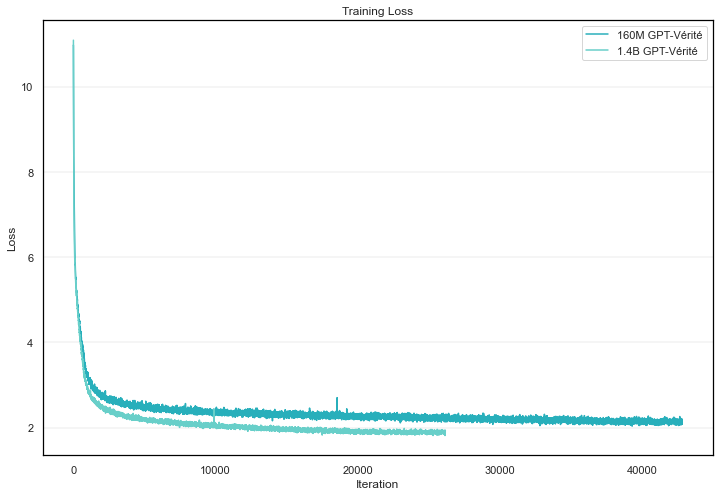

In [9]:
plot_training_loss(losses)

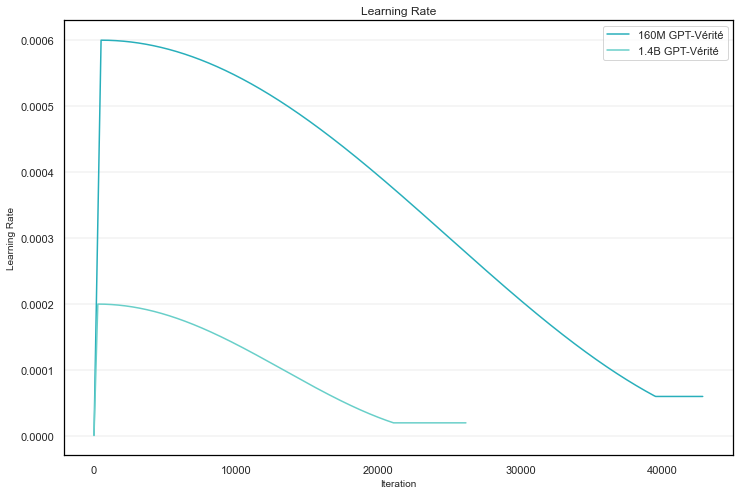

In [8]:
plot_learning_rate(learning_rates)